Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.4509192291113132
Cost after iteration 2000: 0.3777510865088733
Cost after iteration 3000: 0.3406486618586188
Cost after iteration 4000: 0.3169771663976004
Cost after iteration 5000: 0.29989531381760764
Cost after iteration 6000: 0.28662890120505763
Cost after iteration 7000: 0.27582507586693816
Cost after iteration 8000: 0.26673488446929616
Cost after iteration 9000: 0.2589037674989186
Cost after iteration 10000: 0.2520360939088489
Cost after iteration 11000: 0.24592903176286382
Cost after iteration 12000: 0.24043740463641466
Cost after iteration 13000: 0.23545370540899074
Cost after iteration 14000: 0.23089608205028875
Cost after iteration 15000: 0.22670077185184756
Cost after iteration 16000: 0.22281714386500084
Cost after iteration 17000: 0.2192043371026107
Cost after iteration 18000: 0.2158289123788971
Cost after iteration 19000: 0.2126631698620666
Cost after iteration 20000: 0.20968391696189598
Cost after iter

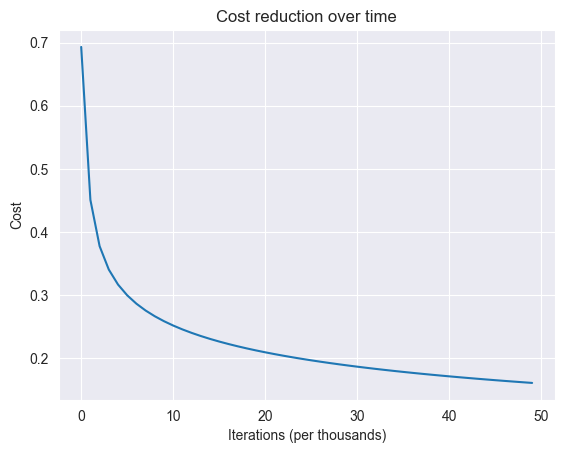

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=50000, regularization_param=0.1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_param = regularization_param

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, n):
        self.W = np.zeros((n, 1))
        self.B = 0

    def propagate(self, X, Y):
        m = X.shape[1]

        # Forward propagation
        Z = np.dot(self.W.T, X) + self.B
        A = self.sigmoid(Z)
        cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + (self.regularization_param / (2 * m)) * np.sum(np.square(self.W))

        # Backward propagation
        dW = (1/m) * np.dot(X, (A - Y).T) + (self.regularization_param / m) * self.W
        dB = (1/m) * np.sum(A - Y)

        grads = {"dW": dW, "dB": dB}
        return grads, cost

    def fit(self, X, Y):
        self.initialize_parameters(X.shape[0])
        self.costs = []

        for i in range(self.num_iterations):
            grads, cost = self.propagate(X, Y)
            self.W -= self.learning_rate * grads["dW"]
            self.B -= self.learning_rate * grads["dB"]

            if i % 1000 == 0:
                self.costs.append(cost)
                print(f"Cost after iteration {i}: {cost}")

        return self

    def predict(self, X):
        Z = np.dot(self.W.T, X) + self.B
        A = self.sigmoid(Z)
        return A > 0.5

def accuracy(X, Y, W, B):
    Z = np.dot(W.T, X) + B
    A = 1 / (1 + np.exp(-Z))
    A = A > 0.5
    A = np.array(A, dtype='int64')
    acc = (1 - np.sum(np.absolute(A - Y)) / Y.shape[1]) * 100
    print("Accuracy of the model is:", round(acc, 2), "%")

# Load the dataset
file_url = 'https://raw.githubusercontent.com/brycisliova/LearnerSpace24-Python-for-DS/main/heart.csv'
heart_data = pd.read_csv(file_url)

# Handle missing values if any
heart_data = heart_data.dropna()

# Prepare the data
X = heart_data.drop(columns=['target']).values
Y = heart_data['target'].values.reshape(-1, 1)

# Normalize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Create polynomial features for better model performance
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# Transpose the data
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

# Train the logistic regression model
log_reg = LogisticRegression(learning_rate=0.001, num_iterations=50000, regularization_param=0.1)
log_reg.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy(X_test, Y_test, log_reg.W, log_reg.B)

# Optionally plot the cost function to see if the model is converging
plt.plot(log_reg.costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per thousands)')
plt.title('Cost reduction over time')
plt.show()
